In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import *
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('/content/drive/MyDrive/LAU/Fall-2022/IEA/Projects/Project 2/csv3/ann2.csv')

# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('0', axis=1).to_numpy()
x_test = test_data.drop('0', axis=1).to_numpy()
y_train = train_data['0'].to_numpy()
y_test = test_data['0'].to_numpy()


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Values before rescaling: ', np.unique(x_train))

#Feature Scaling
scaler = MinMaxScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print('Values after rescaling: ', np.unique(x_train))

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

x_train = np.reshape(x_train, (-1, 1050)).astype('float32')
x_test = np.reshape(x_test, (-1, 1050)).astype('float32')

(2388, 1050)
(796, 1050)
(2388,)
(796,)
Values before rescaling:  [   0    1    2 ... 3180 3181 3182]
Values after rescaling:  [0.00000000e+00 3.14267756e-04 6.28535512e-04 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


1) Model 1 --> 9

In [5]:
model1 = Sequential()
model1.add(Dense(units=62,input_shape=(1050,),activation='softmax'))
model1.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist1 = model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 3ms/step - loss: 4.1150 - accuracy: 0.0398 - val_loss: 3.9557 - val_accuracy: 0.0766
Epoch 2/20
239/239 [==============================] - 1s 3ms/step - loss: 3.7317 - accuracy: 0.1503 - val_loss: 3.7131 - val_accuracy: 0.1558
Epoch 3/20
239/239 [==============================] - 1s 3ms/step - loss: 3.3937 - accuracy: 0.2919 - val_loss: 3.4923 - val_accuracy: 0.2500
Epoch 4/20
239/239 [==============================] - 1s 2ms/step - loss: 3.0881 - accuracy: 0.4175 - val_loss: 3.2926 - val_accuracy: 0.3329
Epoch 5/20
239/239 [==============================] - 1s 2ms/step - loss: 2.8125 - accuracy: 0.5272 - val_loss: 3.1174 - val_accuracy: 0.3631
Epoch 6/20
239/239 [==============================] - 1s 2ms/step - loss: 2.5677 - accuracy: 0.6043 - val_loss: 2.9608 - val_accuracy: 0.3920
Epoch 7/20
239/239 [==============================] - 1s 3ms/step - loss: 2.3503 - accuracy: 0.6554 - val_loss: 2.8221 - val_accuracy: 0.4234
Epoch 

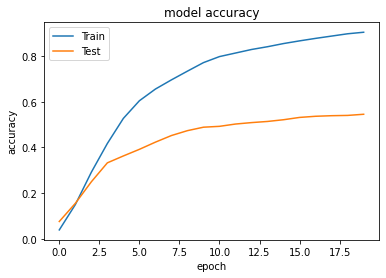

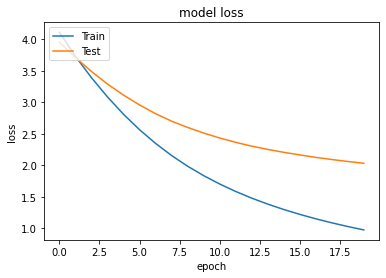

In [6]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [7]:
model2 = Sequential()
model2.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model2.add(Dense(units=62,activation='softmax'))
model2.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist2 = model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 1s 5ms/step - loss: 4.1170 - accuracy: 0.0302 - val_loss: 4.0077 - val_accuracy: 0.0427
Epoch 2/20
239/239 [==============================] - 1s 4ms/step - loss: 3.8277 - accuracy: 0.1294 - val_loss: 3.8271 - val_accuracy: 0.1030
Epoch 3/20
239/239 [==============================] - 1s 4ms/step - loss: 3.5062 - accuracy: 0.2768 - val_loss: 3.5831 - val_accuracy: 0.2060
Epoch 4/20
239/239 [==============================] - 1s 4ms/step - loss: 3.1203 - accuracy: 0.4175 - val_loss: 3.2813 - val_accuracy: 0.3028
Epoch 5/20
239/239 [==============================] - 1s 4ms/step - loss: 2.6904 - accuracy: 0.5540 - val_loss: 2.9770 - val_accuracy: 0.3693
Epoch 6/20
239/239 [==============================] - 1s 4ms/step - loss: 2.2767 - accuracy: 0.6302 - val_loss: 2.6777 - val_accuracy: 0.4259
Epoch 7/20
239/239 [==============================] - 1s 4ms/step - loss: 1.9100 - accuracy: 0.7102 - val_loss: 2.4338 - val_accuracy: 0.4497
Epoch 

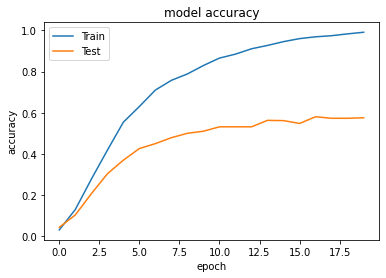

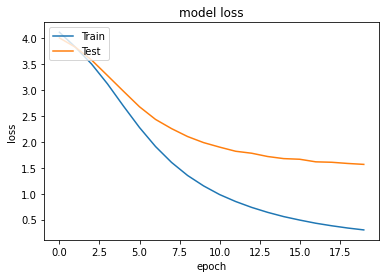

In [8]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [9]:
model3 = Sequential()
model3.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model3.add(Dense(units=256,activation='relu'))
model3.add(Dense(units=62,activation='softmax'))
model3.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist3 = model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 6ms/step - loss: 4.1188 - accuracy: 0.0226 - val_loss: 4.0810 - val_accuracy: 0.0302
Epoch 2/20
239/239 [==============================] - 1s 5ms/step - loss: 3.9584 - accuracy: 0.0879 - val_loss: 3.9809 - val_accuracy: 0.0867
Epoch 3/20
239/239 [==============================] - 1s 6ms/step - loss: 3.7525 - accuracy: 0.1905 - val_loss: 3.8101 - val_accuracy: 0.1445
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 3.4295 - accuracy: 0.3015 - val_loss: 3.4925 - val_accuracy: 0.2425
Epoch 5/20
239/239 [==============================] - 1s 5ms/step - loss: 2.9547 - accuracy: 0.4330 - val_loss: 3.0579 - val_accuracy: 0.3266
Epoch 6/20
239/239 [==============================] - 1s 5ms/step - loss: 2.3815 - accuracy: 0.5360 - val_loss: 2.6341 - val_accuracy: 0.3781
Epoch 7/20
239/239 [==============================] - 1s 5ms/step - loss: 1.8734 - accuracy: 0.6277 - val_loss: 2.2947 - val_accuracy: 0.4372
Epoch 

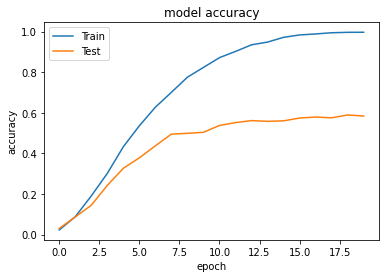

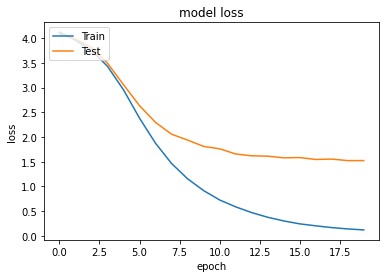

In [10]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [11]:
model4 = Sequential()
model4.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model1.add(Dense(units=256,activation='relu'))
model4.add(Dense(units=62,activation='softmax'))
model4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist4 = model4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 10ms/step - loss: 4.1188 - accuracy: 0.0352 - val_loss: 4.0153 - val_accuracy: 0.0465
Epoch 2/20
239/239 [==============================] - 2s 8ms/step - loss: 3.8397 - accuracy: 0.1231 - val_loss: 3.8362 - val_accuracy: 0.1106
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 3.5335 - accuracy: 0.2676 - val_loss: 3.6085 - val_accuracy: 0.2111
Epoch 4/20
239/239 [==============================] - 2s 8ms/step - loss: 3.1660 - accuracy: 0.4062 - val_loss: 3.3154 - val_accuracy: 0.3040
Epoch 5/20
239/239 [==============================] - 2s 9ms/step - loss: 2.7568 - accuracy: 0.5339 - val_loss: 3.0255 - val_accuracy: 0.3593
Epoch 6/20
239/239 [==============================] - 2s 8ms/step - loss: 2.3537 - accuracy: 0.6185 - val_loss: 2.7286 - val_accuracy: 0.4296
Epoch 7/20
239/239 [==============================] - 2s 6ms/step - loss: 1.9816 - accuracy: 0.6880 - val_loss: 2.5039 - val_accuracy: 0.4548
Epoch

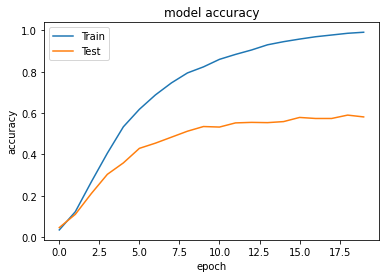

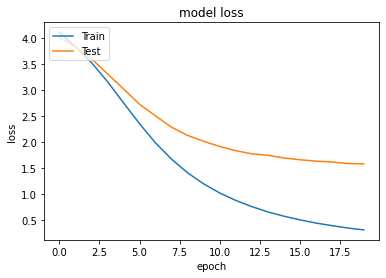

In [12]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [13]:
model5 = Sequential()
model5.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model5.add(Dense(units=256,activation='relu'))
model5.add(Dense(units=256,activation='relu'))
model5.add(Dense(units=62,activation='softmax'))
model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist5 = model5.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 7ms/step - loss: 3.4352 - accuracy: 0.1662 - val_loss: 2.4685 - val_accuracy: 0.3153
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 1.3840 - accuracy: 0.5921 - val_loss: 1.8034 - val_accuracy: 0.4837
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 0.4338 - accuracy: 0.8656 - val_loss: 1.9648 - val_accuracy: 0.4862
Epoch 4/20
239/239 [==============================] - 1s 6ms/step - loss: 0.1329 - accuracy: 0.9640 - val_loss: 1.9462 - val_accuracy: 0.5503
Epoch 5/20
239/239 [==============================] - 1s 6ms/step - loss: 0.0477 - accuracy: 0.9887 - val_loss: 2.0492 - val_accuracy: 0.5477
Epoch 6/20
239/239 [==============================] - 1s 6ms/step - loss: 0.0279 - accuracy: 0.9920 - val_loss: 2.2609 - val_accuracy: 0.5352
Epoch 7/20
239/239 [==============================] - 1s 6ms/step - loss: 0.0566 - accuracy: 0.9870 - val_loss: 2.1440 - val_accuracy: 0.5427
Epoch 

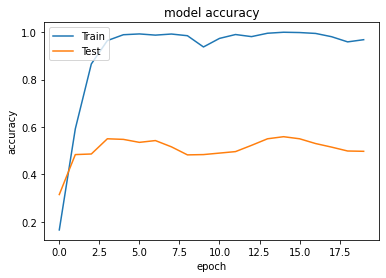

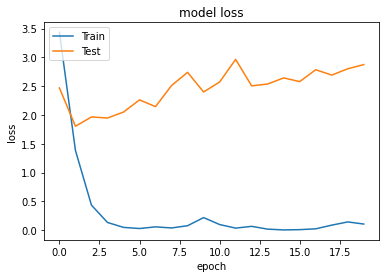

In [14]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [15]:
model6 = Sequential()
model6.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=256,activation='relu'))
model6.add(Dense(units=62,activation='softmax'))
model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist6 = model6.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 8ms/step - loss: 3.5780 - accuracy: 0.1231 - val_loss: 2.4894 - val_accuracy: 0.3367
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 1.7564 - accuracy: 0.4866 - val_loss: 1.8258 - val_accuracy: 0.4761
Epoch 3/20
239/239 [==============================] - 2s 8ms/step - loss: 0.8014 - accuracy: 0.7362 - val_loss: 1.9350 - val_accuracy: 0.4899
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 0.3117 - accuracy: 0.8924 - val_loss: 2.2495 - val_accuracy: 0.4912
Epoch 5/20
239/239 [==============================] - 2s 8ms/step - loss: 0.2054 - accuracy: 0.9322 - val_loss: 2.3002 - val_accuracy: 0.4975
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 0.1529 - accuracy: 0.9502 - val_loss: 2.5647 - val_accuracy: 0.5000
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.1157 - accuracy: 0.9657 - val_loss: 2.6869 - val_accuracy: 0.5013
Epoch 

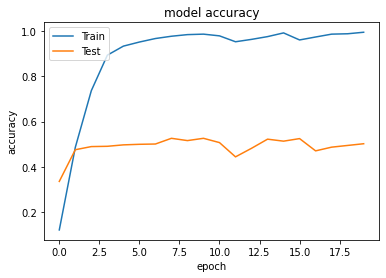

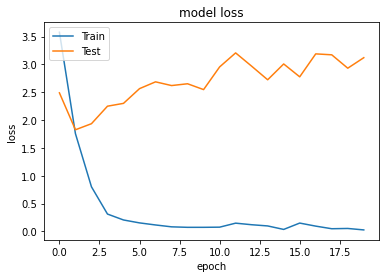

In [16]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

WE realized that adding more layer is not affecting accuracy anymore

In [17]:
model7 = Sequential()
model7.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model7.add(Dense(units=256,activation='relu'))
model7.add(Dense(units=256,activation='tanh'))
model7.add(Dense(units=62,activation='softmax'))
model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist7 = model7.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 2s 7ms/step - loss: 3.2079 - accuracy: 0.2111 - val_loss: 2.0087 - val_accuracy: 0.4623
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 1.1287 - accuracy: 0.6905 - val_loss: 1.6846 - val_accuracy: 0.5176
Epoch 3/20
239/239 [==============================] - 1s 6ms/step - loss: 0.3051 - accuracy: 0.9292 - val_loss: 1.5397 - val_accuracy: 0.5515
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0803 - accuracy: 0.9866 - val_loss: 1.5248 - val_accuracy: 0.5804
Epoch 5/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0324 - accuracy: 0.9937 - val_loss: 1.4989 - val_accuracy: 0.6055
Epoch 6/20
239/239 [==============================] - 1s 6ms/step - loss: 0.0133 - accuracy: 0.9987 - val_loss: 1.5002 - val_accuracy: 0.6181
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.5281 - val_accuracy: 0.6168
Epoch 

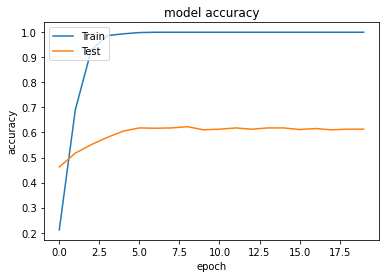

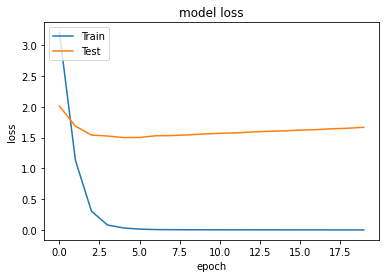

In [18]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [19]:
model8 = Sequential()
model8.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model8.add(Dense(units=256,activation='relu'))
model8.add(Dense(units=256,activation='tanh'))
model8.add(BatchNormalization())
model8.add(Dense(units=62,activation='softmax'))
model8.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist8= model8.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 8ms/step - loss: 2.9219 - accuracy: 0.2839 - val_loss: 2.5512 - val_accuracy: 0.3191
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 0.8523 - accuracy: 0.7697 - val_loss: 1.9795 - val_accuracy: 0.4661
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 0.2653 - accuracy: 0.9443 - val_loss: 1.9017 - val_accuracy: 0.5276
Epoch 4/20
239/239 [==============================] - 2s 6ms/step - loss: 0.0997 - accuracy: 0.9841 - val_loss: 1.8095 - val_accuracy: 0.5540
Epoch 5/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0453 - accuracy: 0.9941 - val_loss: 1.8677 - val_accuracy: 0.5503
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0248 - accuracy: 0.9966 - val_loss: 1.8484 - val_accuracy: 0.5540
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0158 - accuracy: 0.9983 - val_loss: 1.9636 - val_accuracy: 0.5452
Epoch 

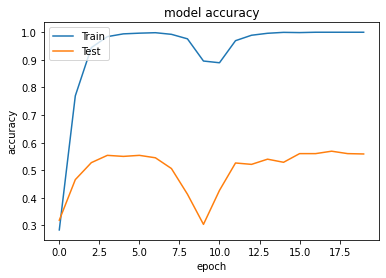

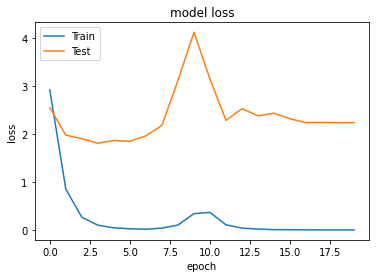

In [20]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

In [23]:
model9 = Sequential()
model9.add(Dense(units=256,input_shape=(1050,),activation='relu'))
model9.add(Dense(units=256,activation='relu'))
model9.add(BatchNormalization())
model9.add(Dense(units=256,activation='relu'))
model9.add(BatchNormalization())
model9.add(Dense(units=62,activation='softmax'))
model9.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
hist9= model9.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=10)

Epoch 1/20
239/239 [==============================] - 3s 9ms/step - loss: 3.3798 - accuracy: 0.1918 - val_loss: 2.8008 - val_accuracy: 0.3028
Epoch 2/20
239/239 [==============================] - 2s 8ms/step - loss: 1.3051 - accuracy: 0.6520 - val_loss: 2.0039 - val_accuracy: 0.4774
Epoch 3/20
239/239 [==============================] - 2s 7ms/step - loss: 0.5811 - accuracy: 0.8539 - val_loss: 1.8601 - val_accuracy: 0.5101
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 0.2667 - accuracy: 0.9443 - val_loss: 1.8662 - val_accuracy: 0.5528
Epoch 5/20
239/239 [==============================] - 2s 8ms/step - loss: 0.1336 - accuracy: 0.9749 - val_loss: 1.9166 - val_accuracy: 0.5339
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0980 - accuracy: 0.9862 - val_loss: 2.0259 - val_accuracy: 0.5402
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 0.0620 - accuracy: 0.9908 - val_loss: 1.9061 - val_accuracy: 0.5565
Epoch 

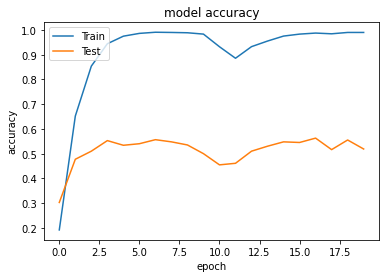

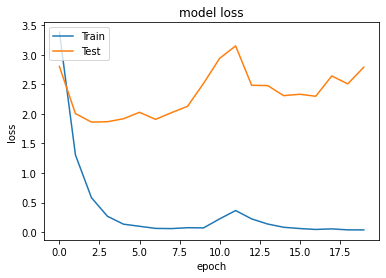

In [24]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(hist9.history['accuracy'])
plt.plot(hist9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
# summarize history for loss
print()
plt.plot(hist9.history['loss'])
plt.plot(hist9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()